In [172]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [173]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery("div.input").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('div.input').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [174]:
# nice, interactive plotting.
%matplotlib notebook

In [175]:
# if KSPDIR is set, load the telemetry file from the game directory. Otherwise, load from current directory
if "KSPDIR" in os.environ:
    telemetry_file = os.path.join(os.environ["KSPDIR"], r"GameData\Telemetry\Trajectories.csv")
else:
    telemetry_file = "Trajectories.csv"

In [176]:
data = pd.read_csv(telemetry_file, sep='\t')
data.fillna(method="ffill", inplace=True) # fill everything we can with the previous value

# Trajectories time analysis

<IPython.core.display.Javascript object>


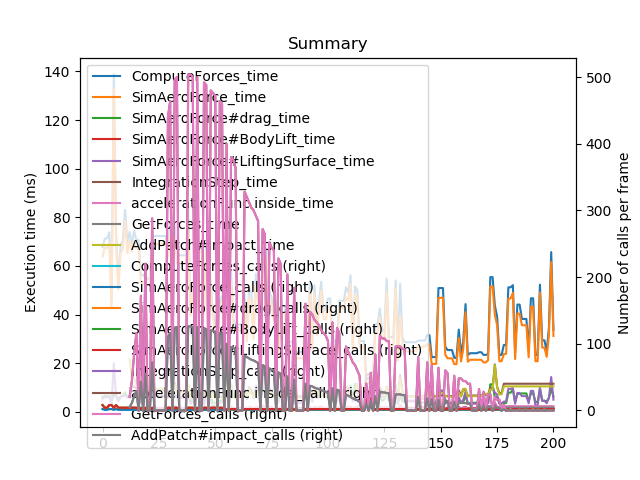

In [177]:
# show all channels for a summary
time = data.columns.str.contains('_time')
calls = data.columns.str.contains('_calls')
dt = data.loc[:,time]
dc = data.loc[:,calls]
ax = dt.plot(legend=True)
ax.set_ylabel("Execution time (ms)");
ax = dc.plot(ax=ax, secondary_y=True, legend=True)
ax.set_ylabel("Number of calls per frame");
plt.xlabel("Frames")
plt.title("Summary")
plt.show()

<IPython.core.display.Javascript object>


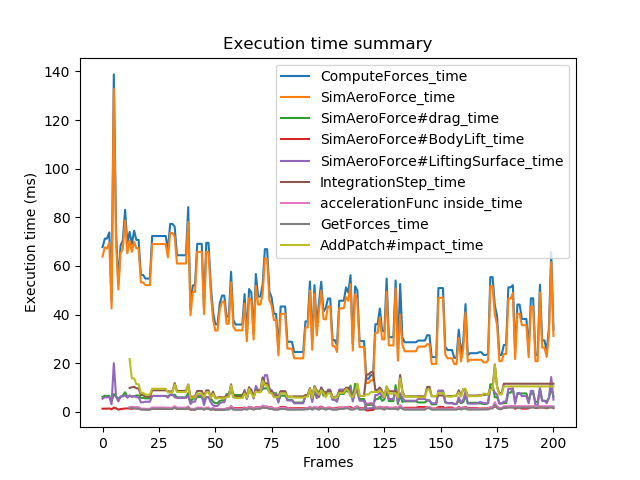

In [178]:
ax = dt.plot(legend=True)
ax.set_ylabel("Execution time (ms)");
plt.xlabel("Frames")
plt.title("Execution time summary")
plt.show()

### Maximum execution times (ms)

In [179]:
np.max(dt)

ComputeForces_time                  138.800000
SimAeroForce_time                   132.900000
SimAeroForce#drag_time               11.500000
SimAeroForce#BodyLift_time            2.350000
SimAeroForce#LiftingSurface_time     20.000000
IntegrationStep_time                 19.460000
accelerationFunc inside_time          3.950000
GetForces_time                        3.108929
AddPatch#impact_time                 21.720000
dtype: float64

### Average execution times (ms)

In [180]:
np.sum(dt) / dt.index[-1]

ComputeForces_time                  44.234833
SimAeroForce_time                   40.948722
SimAeroForce#drag_time               5.966896
SimAeroForce#BodyLift_time           1.531146
SimAeroForce#LiftingSurface_time     6.061028
IntegrationStep_time                 8.025485
accelerationFunc inside_time         1.586522
GetForces_time                       1.142547
AddPatch#impact_time                 7.593581
dtype: float64

<IPython.core.display.Javascript object>


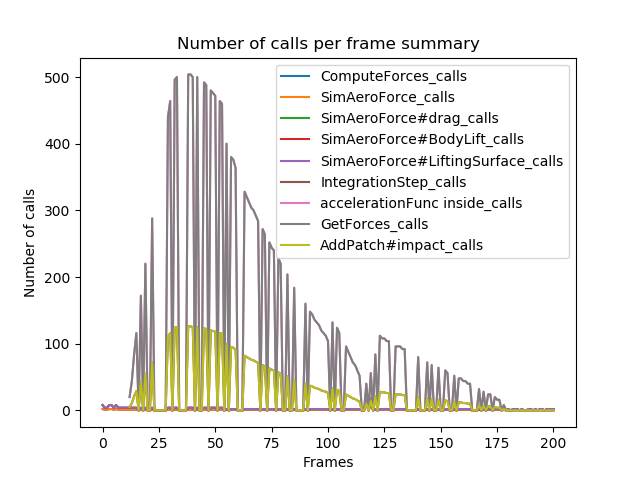

In [184]:
ax = dc.plot(legend=True)
ax.set_ylabel("Number of calls");
plt.xlabel("Frames")
plt.title("Number of calls per frame summary")
plt.show()

### Maximum number of calls per frame

In [182]:
np.max(dc)

ComputeForces_calls                    9.0
SimAeroForce_calls                     9.0
SimAeroForce#drag_calls               18.0
SimAeroForce#BodyLift_calls           18.0
SimAeroForce#LiftingSurface_calls     18.0
IntegrationStep_calls                126.0
accelerationFunc inside_calls        504.0
GetForces_calls                      504.0
AddPatch#impact_calls                126.0
dtype: float64

### Average number of calls per frame

In [183]:
np.sum(dc) / dc.index[-1]

ComputeForces_calls                   0.710
SimAeroForce_calls                    0.710
SimAeroForce#drag_calls               1.800
SimAeroForce#BodyLift_calls           1.800
SimAeroForce#LiftingSurface_calls     1.800
IntegrationStep_calls                22.765
accelerationFunc inside_calls        91.060
GetForces_calls                      91.060
AddPatch#impact_calls                22.765
dtype: float64